##### Data Analysis Project

##### Set up proper imports so there is  access to the Pandas, Matplotlib, and MySQL Connector Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression


#### Use MySQL Connector to establish a connection to my remote data source


In [2]:
newdb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", 
		password="D3v$tudent", use_pure=True)

salesquery = "SELECT * FROM cities"


salesdf = pd.read_sql_query(salesquery, newdb)
salesdf.head()

C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\1245626389.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdf = pd.read_sql_query(salesquery, newdb)


,City_ID,City
0,1,Seattle
1,2,New York City
2,3,Milwaukee


##### We want to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable.


In [12]:
salesqueryjoin = "SELECT * FROM cities INNER JOIN sales ON cities.City_ID= sales.City_ID"

sales_df = pd.read_sql(salesqueryjoin, newdb)

sales_df

C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\2440354783.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(salesqueryjoin, newdb)


,City_ID,City,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating
0,1,Seattle,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0
1,3,Milwaukee,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9
2,3,Milwaukee,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1
3,3,Milwaukee,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2
4,1,Seattle,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Milwaukee,894-41-5205,Normal,Female,Food and beverages,43.18,8,None,362.7120,1/19/2019,19:39,Credit card,345.44,17.2720,8.3
996,2,New York City,895-03-6665,Normal,Female,Fashion accessories,36.51,9,None,345.0195,2/16/2019,10:52,Cash,328.59,16.4295,4.2
997,2,New York City,895-66-0685,Member,Male,Food and beverages,18.08,3,None,56.9520,3/5/2019,19:46,Ewallet,54.24,2.7120,8.0
998,1,Seattle,896-34-0956,Normal,Male,Fashion accessories,21.32,1,None,22.3860,1/26/2019,12:43,Cash,21.32,1.0660,5.9


#### We want to perform the necessary data cleaning and wrangling steps for my DataFrame.

##### Which could include the following:
#####  Exploring the information of the joined DataFrame
##### Checking for and removing null values, if necessary
##### Checking for and removing duplicate rows, if necessary



In [4]:
sales_df.info()
sales_df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City_ID        1000 non-null   int64  
 1   City           1000 non-null   object 
 2   Invoice_ID     1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product_Line   1000 non-null   object 
 6   Unit_Price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Sales_Tax      0 non-null      object 
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  COGS           1000 non-null   float64
 14  Gross_Income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(5), int64(2), object(9)
memory usage: 125.1+ KB


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

#### Converting any necessary columns to Pandas DateTime format

In [23]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_df["Time"] = pd.to_datetime(sales_df["Time"])
sales_df["Time"] = sales_df["Time"].dt.time.astype(str)
sales_df.head()

C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\1781751086.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df["Time"] = pd.to_datetime(sales_df["Time"])


,City_ID,City,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating
0,1,Seattle,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,3,Milwaukee,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,2019-01-17,12:36:00,Ewallet,125.64,6.2820,4.9
2,3,Milwaukee,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,3,Milwaukee,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,1,Seattle,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2019-02-27,12:22:00,Ewallet,42.96,2.1480,6.6


#### Check: How many sales were made for members vs. normal customers?

In [7]:
salesquerysales = "SELECT  CUSTOMER_TYPE,COUNT(TOTAL) FROM sales GROUP BY CUSTOMER_TYPE"
sales_df = pd.read_sql(salesquerysales, newdb)
sales_df


C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\4204441444.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(salesquerysales, newdb)


,CUSTOMER_TYPE,COUNT(TOTAL)
0,Normal,499
1,Member,501


#### Check: How many sales were made at each store location?

In [8]:
salesquerysales = "SELECT City_ID,COUNT(TOTAL) FROM sales GROUP BY City_ID"
sales_df = pd.read_sql(salesquerysales, newdb)
sales_df


C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\1038572681.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(salesquerysales, newdb)


,City_ID,COUNT(TOTAL)
0,1,340
1,3,328
2,2,332


#### Check: How many sales were made for each product line?

In [9]:
salesquerysales = "SELECT Product_Line,COUNT(TOTAL) FROM sales GROUP BY Product_Line"
sales_df = pd.read_sql(salesquerysales, newdb)
sales_df


C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\1795831581.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(salesquerysales, newdb)


,Product_Line,COUNT(TOTAL)
0,Food and beverages,174
1,Health and beauty,152
2,Sports and travel,166
3,Fashion accessories,178
4,Home and lifestyle,160
5,Electronic accessories,170


#### Check: What is the overall average rating, based on all sales records?

In [10]:
salesquerysales = "SELECT AVG(Rating) FROM sales"
sales_df = pd.read_sql(salesquerysales, newdb)
sales_df

C:\Users\Callr\AppData\Local\Temp\ipykernel_1276\4105069324.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(salesquerysales, newdb)


,AVG(Rating)
0,6.9727


#####  I want to create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:
chart title,
X-axis labels, if applicable, 
Y-axis labels, if applicable


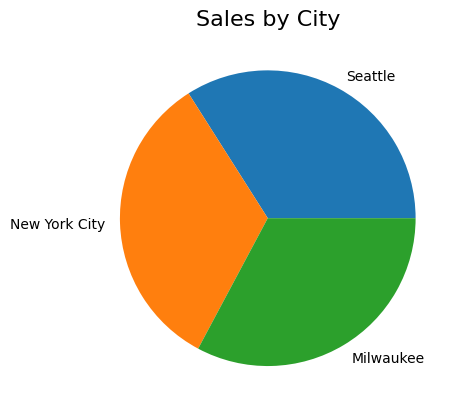

In [14]:
sales_df["City"].value_counts().plot.pie()
plt.title("Sales by City", fontsize= 16)
plt.ylabel('');

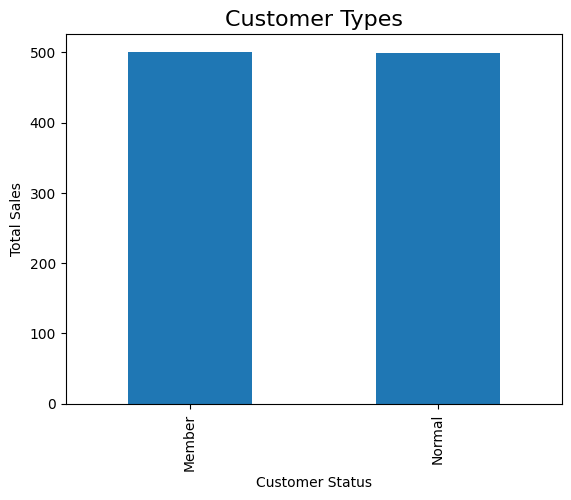

In [15]:
sales_df["Customer_Type"].value_counts().plot.bar()
plt.title("Customer Types", fontsize= 16);
plt.xlabel("Customer Status")
plt.ylabel("Total Sales");

Text(0, 0.5, '')

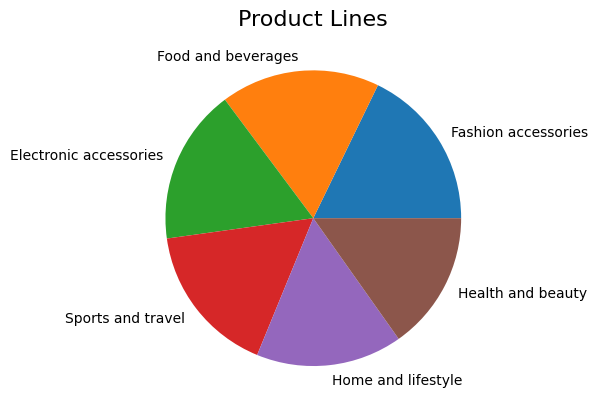

In [16]:
sales_df["Product_Line"].value_counts().plot.pie()
plt.title("Product Lines", fontsize= 16);
plt.ylabel('')

### Describe numeric trends in my DataFrame, using the appropriate Pandas function


In [30]:
sales_df.describe()

,City_ID,Unit_Price,Quantity,Total,Date,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000
mean,1.988000,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270
min,1.000000,10.080000,1.000000,10.678500,2019-01-01 00:00:00,10.17000,0.508500,4.00000
25%,1.000000,32.875000,3.000000,124.422375,2019-01-24 00:00:00,118.49750,5.924875,5.50000
50%,2.000000,55.230000,5.000000,253.848000,2019-02-13 00:00:00,241.76000,12.088000,7.00000
75%,3.000000,77.935000,8.000000,471.350250,2019-03-08 00:00:00,448.90500,22.445250,8.50000
max,3.000000,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,993.00000,49.650000,10.00000
std,0.817633,26.494628,2.923431,245.885335,NaN,234.17651,11.708825,1.71858


#### Explore the correlation between columns of my data set, using the appropriate Pandas function


In [28]:
sales_df.corr(numeric_only=True)

,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
City_ID,1.000000,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238
Unit_Price,0.028202,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.015964,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,0.010238,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


##### Note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  
##### I will ensure my plot includes the following:
        A chart title
        An X-axis label
        A Y-axis label


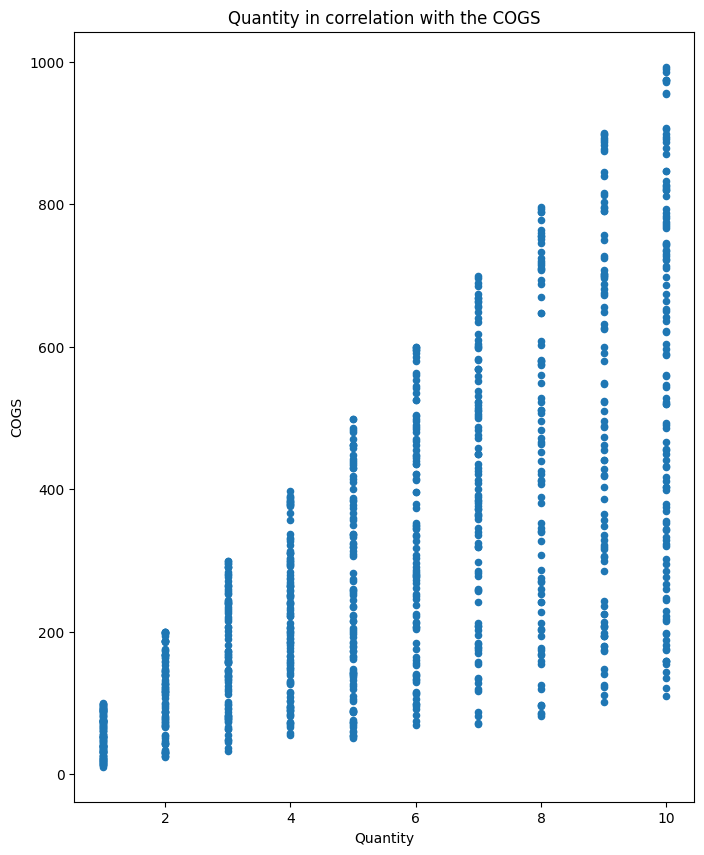

In [68]:
sales_df.plot.scatter(x="Quantity", y = "COGS", figsize = (8,10))
plt.title("Quantity in correlation with the COGS")
plt.xlabel("Quantity")
plt.ylabel("COGS");

####  Reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable


In [69]:
reshaped_x = sales_df[["Quantity"]]
reshaped_y = sales_df["COGS"]


#####  Create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.


In [70]:
linear_regressor = LinearRegression()
linear_regressor.fit(reshaped_x, reshaped_y)
y_prediction = linear_regressor.predict(reshaped_x)


##### Create a visualization of my predictive model, and ensure I include the following stylizations:
            A chart title
            X-axis label
            Y-axis label
            A different color line for my predictive model


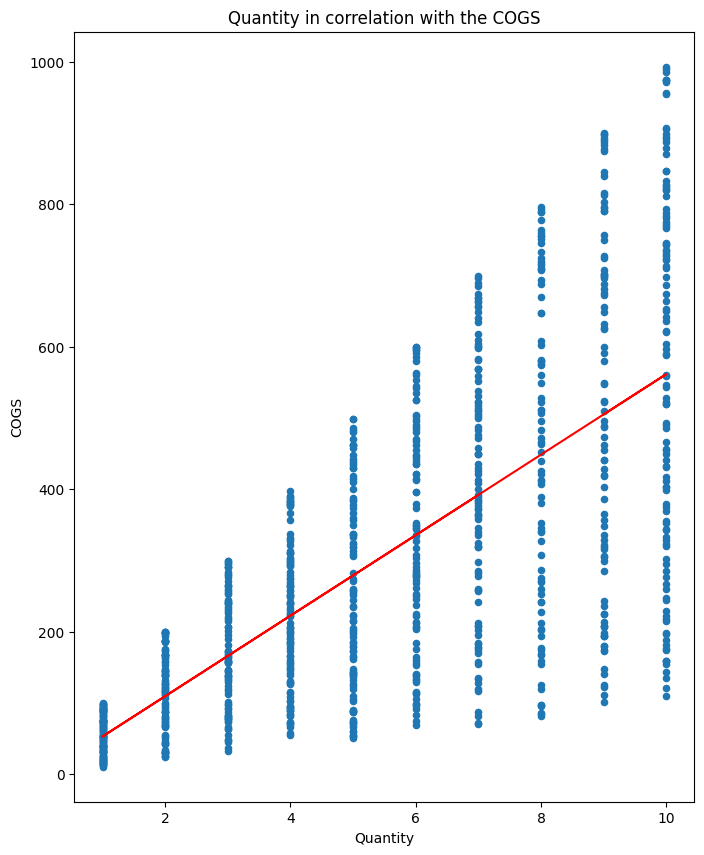

In [71]:
sales_df.plot.scatter(x="Quantity", y = "COGS", figsize = (8,10))
plt.plot(reshaped_x, y_prediction, color ="Red")
plt.title("Quantity in correlation with the COGS")
plt.xlabel("Quantity")
plt.ylabel("COGS");